<a href="https://colab.research.google.com/github/mesha4545a/Assigment-2/blob/master/01_case_study_setup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Week 1 Case Study
[Customer churn](https://en.wikipedia.org/wiki/Churn_rate) - Predict customer retention. 

### Data
- [churn_data.csv](https://raw.githubusercontent.com/gumdropsteve/intro_to_machine_learning/main/day_05/data/churn_data.csv)
- [Data Dictionary](https://docs.google.com/document/d/1SxzoPHWxoLHx_kiPTZEzZOoda2chHbHLdMGAFsGIqCY/edit?usp=sharing)

### Deleverables
1. Analysis of customer data
    - EDA, data viz, etc...
2. Model to predict churn 
    - Classification - LogisticRegression
    - How good is you model?
        - precision, recall, etc...
    - What are the best params?
        - GridSearchCV, etc...
3. Ideas for customer retention programs

In [229]:
import pandas as pd

raw_link = 'https://github.com/gumdropsteve/intro_to_machine_learning/raw/main/day_05/data/churn_data.csv'

df = pd.read_csv(raw_link)

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5087-SUURX,Female,0,Yes,No,18,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,39.05,669.85,Yes
1,1764-VUUMT,Male,0,No,Yes,66,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.95,1269.1,No
2,0089-IIQKO,Female,0,Yes,Yes,39,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.95,3767.4,No
3,1960-UYCNN,Male,0,No,No,10,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,95.25,1021.55,No
4,8224-IVVPA,Female,0,No,No,27,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,56.70,1652.95,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,5119-KEPFY,Male,0,Yes,No,36,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),95.00,3440.25,No
6334,6923-JHPMP,Female,0,No,No,2,Yes,No,Fiber optic,Yes,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,80.45,137.1,No
6335,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
6336,4098-NAUKP,Male,1,Yes,Yes,68,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,84.65,5683.6,No


### EDA

In [2]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,6338.000000,6338.000000,6338.000000
mean,0.161723,32.283843,64.983236
std,0.368226,24.529521,29.992970
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,36.450000
50%,0.000000,29.000000,70.500000
75%,0.000000,55.000000,90.000000
max,1.000000,72.000000,118.600000


In [10]:
df.SeniorCitizen

0       0
1       0
2       0
3       0
4       0
       ..
6333    0
6334    0
6335    0
6336    1
6337    0
Name: SeniorCitizen, Length: 6338, dtype: int64

In [16]:
df.SeniorCitizen.sample(20)

4490    0
40      0
4231    0
1342    0
6302    0
6292    1
4391    0
2681    0
4384    0
4517    0
1640    0
1224    0
6077    0
3474    0
6067    1
2510    0
4891    0
4443    1
1533    0
5311    0
Name: SeniorCitizen, dtype: int64

### vis

In [5]:
df.describe(exclude='number')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338
unique,6338,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,5921,2
top,3070-DVEYC,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3197,3267,4435,5717,3047,2796,3155,2804,2785,3126,2529,2517,3503,3769,2150,11,4650


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

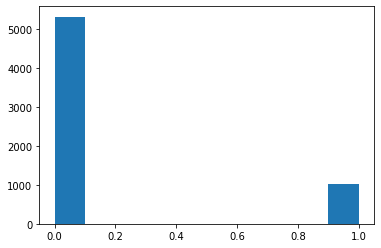

In [71]:
plt.hist(x=df.SeniorCitizen);

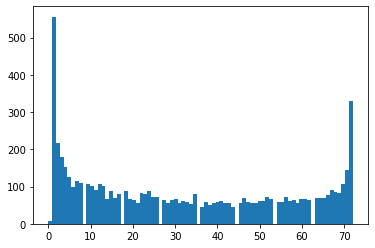

In [75]:
plt.hist(x=df.tenure,bins=80);

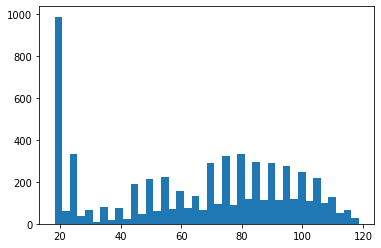

In [82]:
plt.hist(x=df.MonthlyCharges, bins = 40);

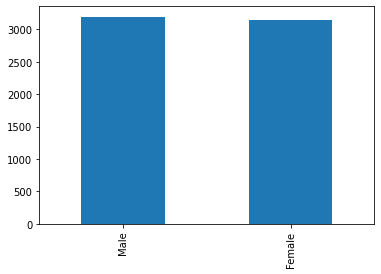

In [83]:
df['gender'].value_counts().plot(kind='bar')

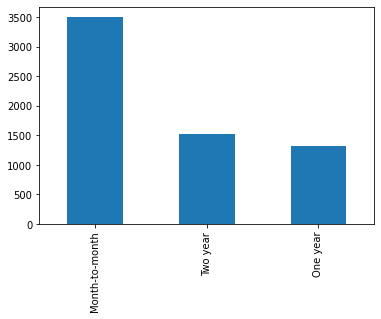

In [85]:
df['Contract'].value_counts().plot(kind='bar')

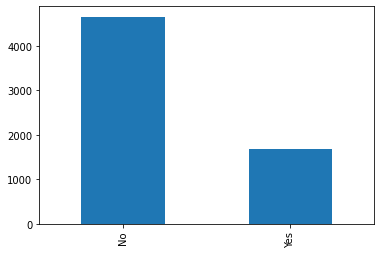

In [86]:
df['Churn'].value_counts().plot(kind='bar')

## Setting up a simple Logistic Regression
[Sklearn docs - LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [265]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [266]:
dummy = df.Churn.map(dict(Yes=1, No=0))
dummy 


0       1
1       0
2       0
3       0
4       0
       ..
6333    0
6334    0
6335    0
6336    0
6337    0
Name: Churn, Length: 6338, dtype: int64

Define a very simple `X` and `y`...

- `X` is / are your varible(s) that will help predict `y`
- `y` is your "target" (what you're trying to predict)

In [267]:
from sklearn.model_selection import train_test_split

X = df[['SeniorCitizen', 'tenure']]
y = dummy
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

Fit the model...

Note: I skipped a step in setting up the data...

In [268]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Make predictions...

In [269]:
lr.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [270]:
preds = lr.predict(X_test)

### scors

In [271]:
from sklearn.metrics import precision_score
precision_score(y_test, preds, average='weighted')

0.7310217636619806

In [272]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, preds, average='weighted')

(0.7310217636619806, 0.7518401682439537, 0.691652127288399, None)

In [273]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, preds)

0.7518401682439537

In [274]:
from sklearn.metrics import r2_score

r2_score(y_test, preds)

-0.26300328784005655

From here you'd...

1. Figure our your precision, recall, score, etc..
2. Make it into a pipeline... ([Docs Help](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) | [Basic Skeleton Code Help](https://github.com/gumdropsteve/intro_to_machine_learning/blob/main/day_03/02_assignment.ipynb))
3. Figure out your best hyperparams (GridSearchCV)...
4. Make that model...
5. ...

### pipline

In [275]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
def M_LR(**kwargs):
    return make_pipeline(LogisticRegression(**kwargs))

In [287]:
from sklearn.model_selection import GridSearchCV 
param_grid= {'logisticregression__fit_intercept': [True,False],
             'logisticregression__penalty':['l1','l2', 'elasticnet','none'], 
             'logisticregression__dual' : [True, False],
             'logisticregression__warm_start' : [True, False]}


grid = GridSearchCV(M_LR(), param_grid, cv=7)

In [288]:
grid.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only dual=False, got dual=True

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/

GridSearchCV(cv=7, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('logisticregression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                           random_state=None,
                                  

In [289]:
grid.best_params_

{'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__penalty': 'l2',
 'logisticregression__warm_start': True}

In [290]:
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

model.fit(X_train, y_train)

preds = model.predict(X_test)

In [291]:
from sklearn.metrics import r2_score

r2_score(y_test, preds)

0.17473969219779617